<h2> Grand Junction Flood Risk Model </h2>

<b> 1. Import Data </b>

In [6]:
data_directory: str = 'C:/Users/l2pdwds9/Desktop/Grand_Junction/Import_Data/'
terrain_file: str = 'terrain.tif' # raster file containing terrain DEM data
inventory_file: str = 'GJ_Inventory_REV1.shp' # shapefile containing structure inventory data
floodplain_13JUN_file: str = 'Depth_13JUN3000_WOP.tif' # imports depth raster for 13JUN without project floodplain

<b> 2. Terrain Data </b>

In [7]:
import rasterio as rio 
import earthpy.plot as ep
import matplotlib.pyplot as plt 
from rasterio.plot import plotting_extent
dataset = rio.open(data_directory + terrain_file) #open terrain data
print('terrain.tif: {bands: ' + str(dataset.count) + ', width: ' + str(dataset.width) + ', height: ' + str(dataset.height) + '}')
terrain = dataset.read(1, masked = True)

terrain.tif: {bands: 1, width: 3750, height: 2500}


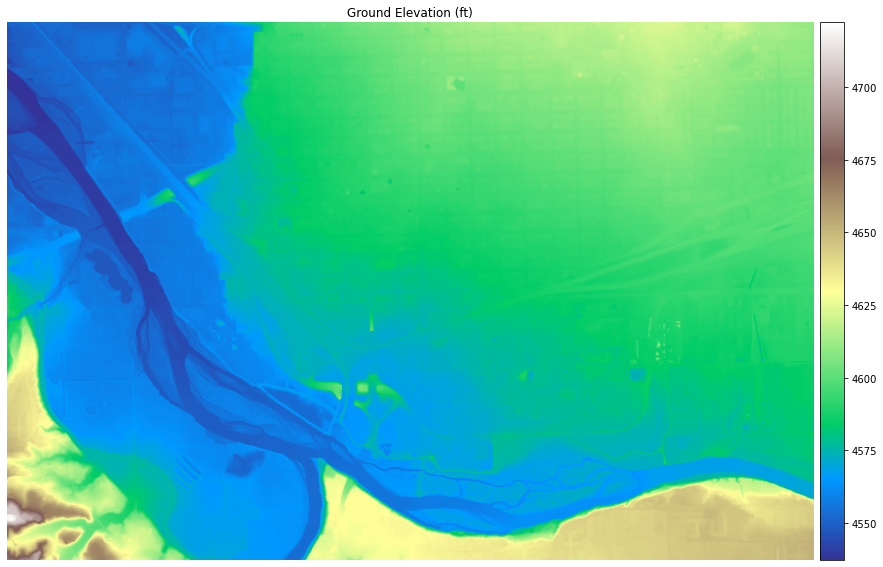

In [8]:
fig, ax = plt.subplots(figsize=(15,10)) #following code plots terrain data
ep.plot_bands(terrain, extent=plotting_extent(dataset), cmap='terrain',  title="Ground Elevation (ft)", scale=False, ax=ax) # color maps: https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html
ax.set_axis_off()
plt.show()


<b> 3. Structure Inventory Data </b>

In [9]:
import geopandas
from IPython.display import display, HTML

inventory = geopandas.read_file(data_directory + inventory_file)
inventory.head() 

,PARCELNUM,LOCATION,PROPTYPE,IMPVALCUR,IMPASSCUR,IMPVALPRE,IMPASSPRE,Shape_STAr,Shape_STLe,CENTROID_X,CENTROID_Y,geometry
0,294515429015,417 LAWRENCE AVE,Residential,80330.0,5740.0,70630.0,5090.0,580.738649,106.692563,-7.474879e+06,2.043955e+06,POINT (-7474879.167 2043955.435)
1,294515427024,412 CHULUOTA AVE,Residential,78370.0,5600.0,71470.0,5150.0,412.127252,95.959131,-7.475471e+06,2.044205e+06,POINT (-7475470.764 2044205.108)
2,294515440001,409 W MAIN ST,Residential,134440.0,9610.0,120000.0,8640.0,1088.966122,167.092720,-7.475143e+06,2.045092e+06,POINT (-7475142.897 2045091.686)
3,294515400128,522 W MAIN ST,Exempt,0.0,0.0,0.0,0.0,731.922527,126.539910,-7.475373e+06,2.045419e+06,POINT (-7475373.331 2045419.329)
4,294515425007,405 PARK AVE,Residential,0.0,0.0,0.0,0.0,870.176749,121.878587,-7.475948e+06,2.044423e+06,POINT (-7475948.383 2044422.662)


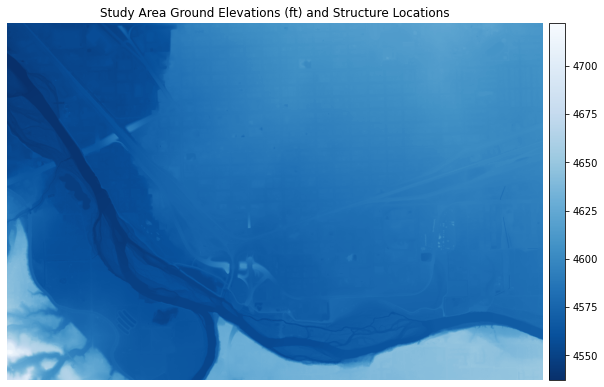

In [10]:
fig, ax = plt.subplots(figsize=(10, 10))
ep.plot_bands(terrain, extent=plotting_extent(dataset), cmap='Blues_r', title="Study Area Ground Elevations (ft) and Structure Locations", scale=False, ax=ax)
ax.set_axis_off()
plt.show()

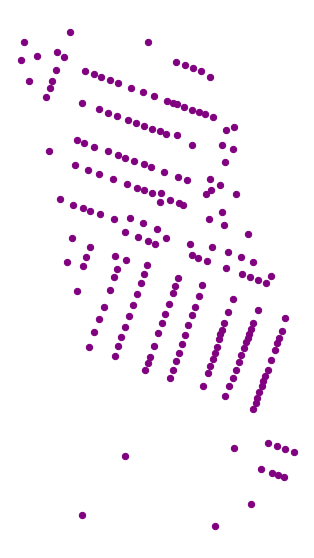

In [11]:
fig, ax=plt.subplots(figsize=(10,10))
inventory.plot(ax=ax, marker='o', markersize=40,  color='purple')
ax.set_axis_off()
plt.show()


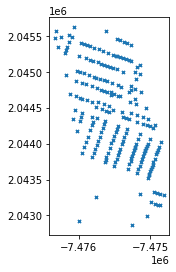

In [12]:
inventory.plot(marker='x', markersize=10)

In [13]:
print(dataset.crs)

EPSG:26912


In [14]:
print(inventory.crs)

PROJCS["NAD83 / Maryland (ftUS)",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433],AUTHORITY["EPSG","4269"]],PROJECTION["Lambert_Conformal_Conic_2SP"],PARAMETER["latitude_of_origin",37.6666666666667],PARAMETER["central_meridian",-77],PARAMETER["standard_parallel_1",38.3],PARAMETER["standard_parallel_2",39.45],PARAMETER["false_easting",1312333.33333333],PARAMETER["false_northing",0],UNIT["US survey foot",0.304800609601219,AUTHORITY["EPSG","9003"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


In [15]:


inventory = inventory.to_crs(dataset.crs) # check that inventory and terrain use same CRS, per https://geopandas.org/mapping.html

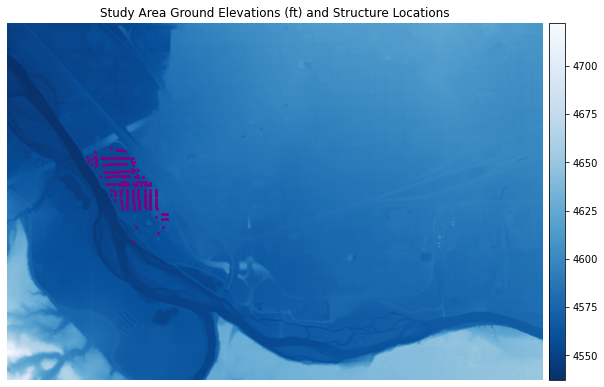

In [16]:
fig, ax = plt.subplots(figsize=(10, 10))
ep.plot_bands(terrain, extent=plotting_extent(dataset), cmap='Blues_r', title="Study Area Ground Elevations (ft) and Structure Locations", scale=False, ax=ax)
inventory.plot(ax=ax, marker='o', markersize=4,  color='purple')
ax.set_axis_off()
plt.show()
#overlays structures on terrain plot

<b> 4. Import Hydraulic Data </b>

In [17]:
dataset=rio.open(data_directory + floodplain_13JUN_file)
print('Depth_13JUN3000_WOP.tif: {bands: ' + str(dataset.count) + ', width: ' + str(dataset.width) + ' , height: ' + str(dataset.height) +'}')
floodplain13june = dataset.read(1, masked = True)
# importing 13june floodplain, without project
# still need to import other floodplains

Depth_13JUN3000_WOP.tif: {bands: 1, width: 3750 , height: 2500}


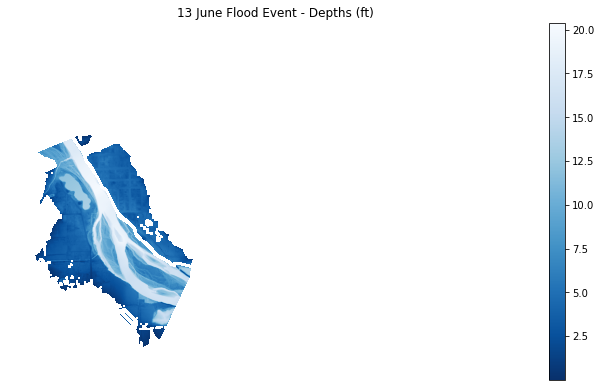

In [18]:
#plot hydraulic data
fig, ax = plt.subplots(figsize=(10,10))
ep.plot_bands(floodplain13june, extent=plotting_extent(dataset), cmap='Blues_r', title="13 June Flood Event - Depths (ft)", scale=False, ax=ax)
ax.set_axis_off()
plt.show()


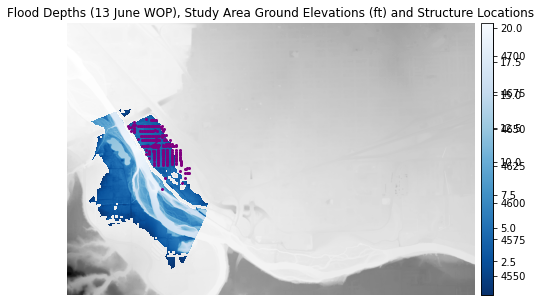

In [179]:
#plot hydraulic data on terrain
fig, ax = plt.subplots(figsize=(10, 5))
ep.plot_bands(terrain, extent=plotting_extent(dataset), cmap='Greys', title="Flood Depths (13 June WOP), Study Area Ground Elevations (ft) and Structure Locations", scale=False, ax=ax)
ep.plot_bands(floodplain13june, extent=plotting_extent(dataset), cmap='Blues_r', scale=False, ax=ax)
inventory.plot(ax=ax, marker='o', markersize=4,  color='purple')
ax.set_axis_off()
plt.show()

In [20]:
#importing future without project (WOP) floodplains
floodplain_12JUN_file: str = 'Depth_12JUN3000_WOP.tif'
floodplain_11JUN_file: str = 'Depth_11JUN3000_WOP.tif'
floodplain_10JUN_file: str = 'Depth_10JUN3000_WOP.tif'
floodplain_09JUN_file: str = 'Depth_09JUN3000_WOP.tif'
floodplain_08JUN_file: str = 'Depth_08JUN3000_WOP.tif'
floodplain_07JUN_file: str = 'Depth_07JUN3000_WOP.tif'

In [21]:
#importing future with project floodplains for floodwall altternative (FW)
floodplain_13JUNFW_file: str = 'Depth_13JUN3000_FW.tif'
floodplain_12JUNFW_file: str = 'Depth_12JUN3000_FW.tif'
floodplain_11JUNFW_file: str = 'Depth_11JUN3000_FW.tif'
floodplain_10JUNFW_file: str = 'Depth_10JUN3000_FW.tif'
floodplain_09JUNFW_file: str = 'Depth_09JUN3000_FW.tif'
floodplain_08JUNFW_file: str = 'Depth_08JUN3000_FW.tif'
floodplain_07JUNFW_file: str = 'Depth_07JUN3000_FW.tif'

<b> 5. Join Terrain, Floodplain, Inventory Data </b>


In [22]:
#add elevation to inventory at each point
from rasterstats import zonal_stats, point_query
inventory['elevation']=-999
elevation_array=point_query(inventory, data_directory + terrain_file)
for i, row in inventory.iterrows():
    inventory.loc[i, 'elevation'] = elevation_array[i]
inventory.head()

,PARCELNUM,LOCATION,PROPTYPE,IMPVALCUR,IMPASSCUR,IMPVALPRE,IMPASSPRE,Shape_STAr,Shape_STLe,CENTROID_X,CENTROID_Y,geometry,elevation
0,294515429015,417 LAWRENCE AVE,Residential,80330.0,5740.0,70630.0,5090.0,580.738649,106.692563,-7.474879e+06,2.043955e+06,POINT (2329171.678 14195252.981),4574.279986
1,294515427024,412 CHULUOTA AVE,Residential,78370.0,5600.0,71470.0,5150.0,412.127252,95.959131,-7.475471e+06,2.044205e+06,POINT (2328529.665 14195270.184),4558.348866
2,294515440001,409 W MAIN ST,Residential,134440.0,9610.0,120000.0,8640.0,1088.966122,167.092720,-7.475143e+06,2.045092e+06,POINT (2328512.317 14196215.462),4562.847631
3,294515400128,522 W MAIN ST,Exempt,0.0,0.0,0.0,0.0,731.922527,126.539910,-7.475373e+06,2.045419e+06,POINT (2328178.366 14196436.789),4557.233696
4,294515425007,405 PARK AVE,Residential,0.0,0.0,0.0,0.0,870.176749,121.878587,-7.475948e+06,2.044423e+06,POINT (2328005.524 14195298.963),4557.017949


In [23]:
#loop to add WOP depths to each strcuture
#list of wop_events
wop_events=['JUNE07WOP','JUNE08WOP','JUNE09WOP','JUNE10WOP','JUNE11WOP','JUNE12WOP','JUNE13WOP']
#list of wop file names
wop_files=['floodplain_07JUN_file', 'floodplain_08JUN_file', 'floodplain_09JUN_file', 'floodplain_10JUN_file', 'floodplain_11JUN_file', 'floodplain_12JUN_file', 'floodplain_13JUN_file']

In [24]:
#create list of tuples using wop_event and wop_files https://stackoverflow.com/questions/2407398/how-to-merge-lists-into-a-list-of-tuples 
wop = list(zip(wop_events,wop_files))

In [25]:
print(wop)

[('JUNE07WOP', 'floodplain_07JUN_file'), ('JUNE08WOP', 'floodplain_08JUN_file'), ('JUNE09WOP', 'floodplain_09JUN_file'), ('JUNE10WOP', 'floodplain_10JUN_file'), ('JUNE11WOP', 'floodplain_11JUN_file'), ('JUNE12WOP', 'floodplain_12JUN_file'), ('JUNE13WOP', 'floodplain_13JUN_file')]


In [26]:
for a in wop:
    

SyntaxError: unexpected EOF while parsing (<ipython-input-26-4cab2be4a640>, line 2)

In [27]:
#add wop depths to each strucure
from rasterstats import zonal_stats, point_query
#write loop to attached depths to structures


from rasterstats import zonal_stats, point_query
inventory['JUNE13FW']=-999
JUNE13FW_array=point_query(inventory, data_directory+floodplain_13JUNFW_file)
for i, row in inventory.iterrows():
    inventory.loc[i, 'JUNE13FW'] = JUNE13FW_array[i]


In [28]:
#add 13JUNE_WOP depth to each structure
from rasterstats import zonal_stats, point_query
inventory['JUNE13WOP']=-999
JUNE13WOP_array=point_query(inventory, data_directory+floodplain_13JUN_file)
for i, row in inventory.iterrows():
    inventory.loc[i, 'JUNE13WOP'] = JUNE13WOP_array[i]
inventory.head()

,PARCELNUM,LOCATION,PROPTYPE,IMPVALCUR,IMPASSCUR,IMPVALPRE,IMPASSPRE,Shape_STAr,Shape_STLe,CENTROID_X,CENTROID_Y,geometry,elevation,JUNE13FW,JUNE13WOP
0,294515429015,417 LAWRENCE AVE,Residential,80330.0,5740.0,70630.0,5090.0,580.738649,106.692563,-7.474879e+06,2.043955e+06,POINT (2329171.678 14195252.981),4574.279986,NaN,NaN
1,294515427024,412 CHULUOTA AVE,Residential,78370.0,5600.0,71470.0,5150.0,412.127252,95.959131,-7.475471e+06,2.044205e+06,POINT (2328529.665 14195270.184),4558.348866,1.320567,3.707913
2,294515440001,409 W MAIN ST,Residential,134440.0,9610.0,120000.0,8640.0,1088.966122,167.092720,-7.475143e+06,2.045092e+06,POINT (2328512.317 14196215.462),4562.847631,NaN,NaN
3,294515400128,522 W MAIN ST,Exempt,0.0,0.0,0.0,0.0,731.922527,126.539910,-7.475373e+06,2.045419e+06,POINT (2328178.366 14196436.789),4557.233696,2.435249,3.762783
4,294515425007,405 PARK AVE,Residential,0.0,0.0,0.0,0.0,870.176749,121.878587,-7.475948e+06,2.044423e+06,POINT (2328005.524 14195298.963),4557.017949,2.651485,4.721587


In [29]:
#add 12JUNE_WOP depth to each structure
from rasterstats import zonal_stats, point_query
inventory['JUNE12WOP']=-999
JUNE12WOP_array=point_query(inventory, data_directory+floodplain_12JUN_file)
for i, row in inventory.iterrows():
    inventory.loc[i, 'JUNE12WOP'] = JUNE12WOP_array[i]
inventory.head()

,PARCELNUM,LOCATION,PROPTYPE,IMPVALCUR,IMPASSCUR,IMPVALPRE,IMPASSPRE,Shape_STAr,Shape_STLe,CENTROID_X,CENTROID_Y,geometry,elevation,JUNE13FW,JUNE13WOP,JUNE12WOP
0,294515429015,417 LAWRENCE AVE,Residential,80330.0,5740.0,70630.0,5090.0,580.738649,106.692563,-7.474879e+06,2.043955e+06,POINT (2329171.678 14195252.981),4574.279986,NaN,NaN,NaN
1,294515427024,412 CHULUOTA AVE,Residential,78370.0,5600.0,71470.0,5150.0,412.127252,95.959131,-7.475471e+06,2.044205e+06,POINT (2328529.665 14195270.184),4558.348866,1.320567,3.707913,2.659980
2,294515440001,409 W MAIN ST,Residential,134440.0,9610.0,120000.0,8640.0,1088.966122,167.092720,-7.475143e+06,2.045092e+06,POINT (2328512.317 14196215.462),4562.847631,NaN,NaN,NaN
3,294515400128,522 W MAIN ST,Exempt,0.0,0.0,0.0,0.0,731.922527,126.539910,-7.475373e+06,2.045419e+06,POINT (2328178.366 14196436.789),4557.233696,2.435249,3.762783,2.619538
4,294515425007,405 PARK AVE,Residential,0.0,0.0,0.0,0.0,870.176749,121.878587,-7.475948e+06,2.044423e+06,POINT (2328005.524 14195298.963),4557.017949,2.651485,4.721587,3.654931


In [30]:
#add 11JUNE_WOP, 10JUNE_WOP depth to each structure
from rasterstats import zonal_stats, point_query
inventory['JUNE11WOP']=-999
JUNE11WOP_array=point_query(inventory, data_directory+floodplain_11JUN_file)
for i, row in inventory.iterrows():
    inventory.loc[i, 'JUNE11WOP'] = JUNE11WOP_array[i]
#pulling in 10JUNE_WOP
from rasterstats import zonal_stats, point_query
inventory['JUNE10WOP']=-999
JUNE10WOP_array=point_query(inventory, data_directory+floodplain_10JUN_file)
for i, row in inventory.iterrows():
    inventory.loc[i, 'JUNE10WOP'] = JUNE10WOP_array[i]
inventory.head()

,PARCELNUM,LOCATION,PROPTYPE,IMPVALCUR,IMPASSCUR,IMPVALPRE,IMPASSPRE,Shape_STAr,Shape_STLe,CENTROID_X,CENTROID_Y,geometry,elevation,JUNE13FW,JUNE13WOP,JUNE12WOP,JUNE11WOP,JUNE10WOP
0,294515429015,417 LAWRENCE AVE,Residential,80330.0,5740.0,70630.0,5090.0,580.738649,106.692563,-7.474879e+06,2.043955e+06,POINT (2329171.678 14195252.981),4574.279986,NaN,NaN,NaN,NaN,NaN
1,294515427024,412 CHULUOTA AVE,Residential,78370.0,5600.0,71470.0,5150.0,412.127252,95.959131,-7.475471e+06,2.044205e+06,POINT (2328529.665 14195270.184),4558.348866,1.320567,3.707913,2.659980,1.625310,0.614570
2,294515440001,409 W MAIN ST,Residential,134440.0,9610.0,120000.0,8640.0,1088.966122,167.092720,-7.475143e+06,2.045092e+06,POINT (2328512.317 14196215.462),4562.847631,NaN,NaN,NaN,NaN,NaN
3,294515400128,522 W MAIN ST,Exempt,0.0,0.0,0.0,0.0,731.922527,126.539910,-7.475373e+06,2.045419e+06,POINT (2328178.366 14196436.789),4557.233696,2.435249,3.762783,2.619538,1.457737,0.249022
4,294515425007,405 PARK AVE,Residential,0.0,0.0,0.0,0.0,870.176749,121.878587,-7.475948e+06,2.044423e+06,POINT (2328005.524 14195298.963),4557.017949,2.651485,4.721587,3.654931,2.602182,1.545733


In [31]:
#add 09, 07, 08JUNE_WOP depth to each structure
from rasterstats import zonal_stats, point_query
inventory['JUNE09WOP']=-999
JUNE09WOP_array=point_query(inventory, data_directory+floodplain_09JUN_file)
for i, row in inventory.iterrows():
    inventory.loc[i, 'JUNE09WOP'] = JUNE09WOP_array[i]
#pulling in 08JUNE_WOP
from rasterstats import zonal_stats, point_query
inventory['JUNE08WOP']=-999
JUNE08WOP_array=point_query(inventory, data_directory+floodplain_08JUN_file)
for i, row in inventory.iterrows():
    inventory.loc[i, 'JUNE08WOP'] = JUNE08WOP_array[i]
#pulling in 07JUNE_WOP
from rasterstats import zonal_stats, point_query
inventory['JUNE07WOP']=-999
JUNE07WOP_array=point_query(inventory, data_directory+floodplain_07JUN_file)
for i, row in inventory.iterrows():
    inventory.loc[i, 'JUNE07WOP'] = JUNE07WOP_array[i]
inventory.head()

,PARCELNUM,LOCATION,PROPTYPE,IMPVALCUR,IMPASSCUR,IMPVALPRE,IMPASSPRE,Shape_STAr,Shape_STLe,CENTROID_X,...,geometry,elevation,JUNE13FW,JUNE13WOP,JUNE12WOP,JUNE11WOP,JUNE10WOP,JUNE09WOP,JUNE08WOP,JUNE07WOP
0,294515429015,417 LAWRENCE AVE,Residential,80330.0,5740.0,70630.0,5090.0,580.738649,106.692563,-7.474879e+06,...,POINT (2329171.678 14195252.981),4574.279986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,294515427024,412 CHULUOTA AVE,Residential,78370.0,5600.0,71470.0,5150.0,412.127252,95.959131,-7.475471e+06,...,POINT (2328529.665 14195270.184),4558.348866,1.320567,3.707913,2.659980,1.625310,0.614570,NaN,NaN,NaN
2,294515440001,409 W MAIN ST,Residential,134440.0,9610.0,120000.0,8640.0,1088.966122,167.092720,-7.475143e+06,...,POINT (2328512.317 14196215.462),4562.847631,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,294515400128,522 W MAIN ST,Exempt,0.0,0.0,0.0,0.0,731.922527,126.539910,-7.475373e+06,...,POINT (2328178.366 14196436.789),4557.233696,2.435249,3.762783,2.619538,1.457737,0.249022,NaN,NaN,NaN
4,294515425007,405 PARK AVE,Residential,0.0,0.0,0.0,0.0,870.176749,121.878587,-7.475948e+06,...,POINT (2328005.524 14195298.963),4557.017949,2.651485,4.721587,3.654931,2.602182,1.545733,0.489096,NaN,NaN


In [32]:
#attached future with project floodplain depth to each structure
from rasterstats import zonal_stats, point_query
inventory['JUNE13FW']=-999
JUNE13FW_array=point_query(inventory, data_directory+floodplain_13JUNFW_file)
for i, row in inventory.iterrows():
    inventory.loc[i, 'JUNE13FW'] = JUNE13FW_array[i]

inventory['JUNE12FW']=-999
JUNE12FW_array=point_query(inventory, data_directory+floodplain_12JUNFW_file)
for i, row in inventory.iterrows():
    inventory.loc[i, 'JUNE12FW'] = JUNE12FW_array[i]

inventory['JUNE11FW']=-999
JUNE11FW_array=point_query(inventory, data_directory+floodplain_11JUNFW_file)
for i, row in inventory.iterrows():
    inventory.loc[i, 'JUNE11FW'] = JUNE11FW_array[i]

inventory['JUNE10FW']=-999
JUNE10FW_array=point_query(inventory, data_directory+floodplain_10JUNFW_file)
for i, row in inventory.iterrows():
    inventory.loc[i, 'JUNE10FW'] = JUNE10FW_array[i]

inventory['JUNE09FW']=-999
JUNE09FW_array=point_query(inventory, data_directory+floodplain_09JUNFW_file)
for i, row in inventory.iterrows():
    inventory.loc[i, 'JUNE09FW'] = JUNE09FW_array[i]

inventory['JUNE08FW']=-999
JUNE08FW_array=point_query(inventory, data_directory+floodplain_08JUNFW_file)
for i, row in inventory.iterrows():
    inventory.loc[i, 'JUNE08FW'] = JUNE08FW_array[i]

inventory['JUNE07FW']=-999
JUNE07FW_array=point_query(inventory, data_directory+floodplain_07JUNFW_file)
for i, row in inventory.iterrows():
    inventory.loc[i, 'JUNE07FW'] = JUNE07FW_array[i]


inventory.head()

,PARCELNUM,LOCATION,PROPTYPE,IMPVALCUR,IMPASSCUR,IMPVALPRE,IMPASSPRE,Shape_STAr,Shape_STLe,CENTROID_X,...,JUNE10WOP,JUNE09WOP,JUNE08WOP,JUNE07WOP,JUNE12FW,JUNE11FW,JUNE10FW,JUNE09FW,JUNE08FW,JUNE07FW
0,294515429015,417 LAWRENCE AVE,Residential,80330.0,5740.0,70630.0,5090.0,580.738649,106.692563,-7.474879e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,294515427024,412 CHULUOTA AVE,Residential,78370.0,5600.0,71470.0,5150.0,412.127252,95.959131,-7.475471e+06,...,0.614570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,294515440001,409 W MAIN ST,Residential,134440.0,9610.0,120000.0,8640.0,1088.966122,167.092720,-7.475143e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,294515400128,522 W MAIN ST,Exempt,0.0,0.0,0.0,0.0,731.922527,126.539910,-7.475373e+06,...,0.249022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,294515425007,405 PARK AVE,Residential,0.0,0.0,0.0,0.0,870.176749,121.878587,-7.475948e+06,...,1.545733,0.489096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
#descriptive statistics (count, median structure value) of structures in 13JUNEWOP floodplain
import pandas as pd

In [34]:
#residential structures in inventory
inventory["PROPTYPE"].describe()

count             212
unique              5
top       Residential
freq              180
Name: PROPTYPE, dtype: object

In [35]:
inventory.describe()

,IMPVALCUR,IMPASSCUR,IMPVALPRE,IMPASSPRE,Shape_STAr,Shape_STLe,CENTROID_X,CENTROID_Y,elevation,JUNE13FW,...,JUNE10WOP,JUNE09WOP,JUNE08WOP,JUNE07WOP,JUNE12FW,JUNE11FW,JUNE10FW,JUNE09FW,JUNE08FW,JUNE07FW
count,2.120000e+02,2.120000e+02,212.000000,212.000000,212.000000,212.000000,2.120000e+02,2.120000e+02,212.000000,155.000000,...,138.000000,37.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000
mean,9.813274e+04,1.188873e+04,64443.915094,5350.047170,1575.115908,137.633777,-7.475492e+06,2.044417e+06,4560.086275,2.081022,...,0.881154,0.713626,2.712026,6.513296,11.964319,10.905685,9.817119,8.701048,7.59027,6.501577
std,2.723664e+05,7.882630e+04,45938.352667,6044.592546,7352.568939,159.857440,3.669041e+02,6.373183e+02,5.100036,1.324934,...,0.947039,1.391384,4.239469,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000e+00,0.000000e+00,0.000000,0.000000,28.664077,23.692526,-7.476331e+06,2.042868e+06,4550.882423,0.106934,...,0.028809,0.021973,0.234222,6.513296,11.964319,10.905685,9.817119,8.701048,7.59027,6.501577
25%,5.448500e+04,4.070000e+03,36370.000000,2675.000000,508.933167,102.959141,-7.475776e+06,2.043919e+06,4557.334015,1.317942,...,0.384183,0.255144,0.264429,6.513296,11.964319,10.905685,9.817119,8.701048,7.59027,6.501577
50%,8.040500e+04,5.755000e+03,67570.000000,4970.000000,604.714254,110.566355,-7.475477e+06,2.044369e+06,4558.188490,1.872228,...,0.659604,0.469512,0.294637,6.513296,11.964319,10.905685,9.817119,8.701048,7.59027,6.501577
75%,1.096350e+05,8.170000e+03,88917.500000,6560.000000,897.587360,126.555119,-7.475196e+06,2.044954e+06,4559.888266,2.709969,...,1.139149,0.797081,3.950928,6.513296,11.964319,10.905685,9.817119,8.701048,7.59027,6.501577
max,3.966940e+06,1.150410e+06,227730.000000,66040.000000,83372.873070,1791.877194,-7.474813e+06,2.045619e+06,4575.910803,13.010038,...,9.819996,8.719276,7.607220,6.513296,11.964319,10.905685,9.817119,8.701048,7.59027,6.501577


In [36]:
# use zonal_stats to produce descriptive stats of structures in 13 June WOP floodplain

# read in inventory and 13JUNEWOP floodpolain in rasterio
# https://automating-gis-processes.github.io/CSC18/lessons/L6/zonal-statistics.html
import rasterio
JUNE13WOP = rasterio.open(data_directory + floodplain_13JUN_file)
array = JUNE13WOP.read(1)
affine = JUNE13WOP.affine

AttributeError: 'DatasetReader' object has no attribute 'affine'

In [37]:
from rasterstats import zonal_stats
stats = zonal_stats ("C:/Users/l2pdwds9/Desktop/Grand_Junction/Import_Data/GJ_Inventory_REV1.shp", "JUNE13WOP", stats=['count'])

RasterioIOError: JUNE13WOP: No such file or directory

In [38]:
from rasterstats import zonal_stats
stats = zonal_stats ("C:/Users/l2pdwds9/Desktop/Grand_Junction/Import_Data/GJ_Inventory_REV1.shp", "C:/Users/l2pdwds9/Desktop/Grand_Junction/Import_Data/Depth_13JUN3000_WOP.tif", attribute = "JUNE13WOP", stats=['count'])

In [39]:
from rasterstats import raster_stats
stats = raster_stats(inventory, data_directory + floodplain_13JUN_file, stats="*")
[x for x in stats if x['PROPTYPE']=="Residential"][0]

KeyError: 'PROPTYPE'

In [40]:
import numpy as np 
inventory["JUNE13WOP"].count()

173

In [41]:
from scipy import stats

In [42]:
stats.describe(inventory["JUNE13WOP"], nan_policy='omit')

DescribeResult(nobs=173, minmax=(masked_array(data=0.17138672,
             mask=False,
       fill_value=1e+20), masked_array(data=12.87966644,
             mask=False,
       fill_value=1e+20)), mean=3.741836032183717, variance=1.4306968625200114, skewness=masked_array(data=1.99298884,
             mask=False,
       fill_value=1e+20), kurtosis=19.192796557505112)

In [43]:
#creates new column, independent from panda dataframe
myColumn = inventory['JUNE13WOP'].dropna()
stats.describe(myColumn)

DescribeResult(nobs=173, minmax=(0.17138671875, 12.87966643880584), mean=3.741836032183717, variance=1.4306968625200114, skewness=1.9929888414097305, kurtosis=19.192796557505112)

In [44]:
print(myColumn)

1      3.707913
3      3.762783
4      4.721587
5      3.429829
6      5.026011
         ...   
207    1.534841
208    4.797152
209    4.748602
210    2.670723
211    3.670737
Name: JUNE13WOP, Length: 173, dtype: float64


In [45]:
np.percentile(myColumn, 50)

3.7974196383834307

<b> Add first floor elevations </b>

In [46]:
#Add 1 foot to existing elevation to capture first floor elevation, per virtual window survey on Google Maps

In [47]:
import numpy as np
import pandas as pd
inventory2=inventory.assign(FFE=inventory['elevation']+1)
inventory2.head()

,PARCELNUM,LOCATION,PROPTYPE,IMPVALCUR,IMPASSCUR,IMPVALPRE,IMPASSPRE,Shape_STAr,Shape_STLe,CENTROID_X,...,JUNE09WOP,JUNE08WOP,JUNE07WOP,JUNE12FW,JUNE11FW,JUNE10FW,JUNE09FW,JUNE08FW,JUNE07FW,FFE
0,294515429015,417 LAWRENCE AVE,Residential,80330.0,5740.0,70630.0,5090.0,580.738649,106.692563,-7.474879e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4575.279986
1,294515427024,412 CHULUOTA AVE,Residential,78370.0,5600.0,71470.0,5150.0,412.127252,95.959131,-7.475471e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4559.348866
2,294515440001,409 W MAIN ST,Residential,134440.0,9610.0,120000.0,8640.0,1088.966122,167.092720,-7.475143e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4563.847631
3,294515400128,522 W MAIN ST,Exempt,0.0,0.0,0.0,0.0,731.922527,126.539910,-7.475373e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4558.233696
4,294515425007,405 PARK AVE,Residential,0.0,0.0,0.0,0.0,870.176749,121.878587,-7.475948e+06,...,0.489096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4558.017949


In [48]:
for index, row in inventory.iterrows():
    inventory['FFE']=inventory['elevation']+1
inventory.head()

,PARCELNUM,LOCATION,PROPTYPE,IMPVALCUR,IMPASSCUR,IMPVALPRE,IMPASSPRE,Shape_STAr,Shape_STLe,CENTROID_X,...,JUNE09WOP,JUNE08WOP,JUNE07WOP,JUNE12FW,JUNE11FW,JUNE10FW,JUNE09FW,JUNE08FW,JUNE07FW,FFE
0,294515429015,417 LAWRENCE AVE,Residential,80330.0,5740.0,70630.0,5090.0,580.738649,106.692563,-7.474879e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4575.279986
1,294515427024,412 CHULUOTA AVE,Residential,78370.0,5600.0,71470.0,5150.0,412.127252,95.959131,-7.475471e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4559.348866
2,294515440001,409 W MAIN ST,Residential,134440.0,9610.0,120000.0,8640.0,1088.966122,167.092720,-7.475143e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4563.847631
3,294515400128,522 W MAIN ST,Exempt,0.0,0.0,0.0,0.0,731.922527,126.539910,-7.475373e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4558.233696
4,294515425007,405 PARK AVE,Residential,0.0,0.0,0.0,0.0,870.176749,121.878587,-7.475948e+06,...,0.489096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4558.017949


<b> Create depth damage curve </b>

In [49]:
#use generic depth damage curve for single family res: https://planning.erdc.dren.mil/toolbox/library/EGMs/egm04-01.pdf

#creating list of tuples of depth damage curve
one_story_no_basement = [(-2, 0.000), (-1, 0.025), (0, 0.134), (1, 0.233), (2, 0.321), (3, 0.401), (4, 0.471), (5, 0.532), (6, 0.586), (7, 0.632), (8, 0.672), (9, 0.705), (10, 0.732), (11, 0.754), (12, 0.772), (13, 0.785), (14, 0.795), (15, 0.802), (16, 0.807)]

In [50]:
len(one_story_no_basement)
one_story_no_basement?

Type:        list
String form: [(-2, 0.0), (-1, 0.025), (0, 0.134), (1, 0.233), (2, 0.321), (3, 0.401), (4, 0.471), (5, 0.532),  <...> .705), (10, 0.732), (11, 0.754), (12, 0.772), (13, 0.785), (14, 0.795), (15, 0.802), (16, 0.807)]
Length:      19
Docstring:  
Built-in mutable sequence.

If no argument is given, the constructor creates a new empty list.
The argument must be an iterable if specified.


In [51]:
one_story_no_basement[1]

(-1, 0.025)

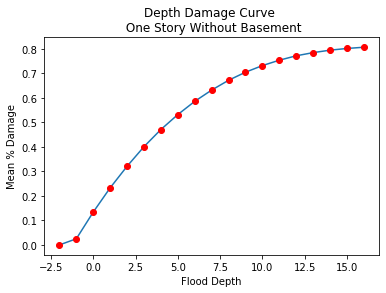

In [52]:
#ploting depth damage curve from list of tuples
import matplotlib.pyplot as plt
plt.plot(*zip(*one_story_no_basement))
plt.plot(*zip(*one_story_no_basement), 'or')
plt.title('Depth Damage Curve \n One Story Without Basement')
plt.xlabel('Flood Depth')
plt.ylabel('Mean % Damage')
plt.show()

In [53]:
#linear interpolation of depth damage curve: https://stackoverflow.com/questions/61707086/interpolation-from-data-plotted-with-tuples-in-lists-using-python

depth = [c[0] for c in one_story_no_basement]
damage = [c[1] for c in one_story_no_basement]

In [54]:
len(depth)
len(damage)

19

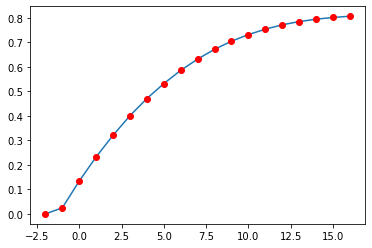

In [55]:
plt.plot(depth, damage)
plt.plot(depth, damage, 'or')
plt.show()

In [56]:
from scipy import interpolate

depth_damage=interpolate.interp1d(depth, damage, kind='linear')

In [57]:
print(depth_damage(1.5))

0.277


In [58]:
def depth_dam_funct(x):
    return depth_damage(x)

<b> Calculate damages per event at each structure </b>

In [59]:
#define first floor elevation for (factor by which to shift down flood depths)
first_floor = 1

In [60]:
import numpy as np
import pandas as pd
#create new column with percentage of damage at each structure for each event (depth damage function applied to depth per event)
#without project
inventory2['JUNE13WOP_DAM_PERCENT'] = (inventory2['JUNE13WOP'].apply(lambda x: depth_dam_funct(x-first_floor))).fillna(0)
inventory2['JUNE12WOP_DAM_PERCENT'] = (inventory2['JUNE12WOP'].apply(lambda x: depth_dam_funct(x-first_floor))).fillna(0)
inventory2['JUNE11WOP_DAM_PERCENT'] = (inventory2['JUNE11WOP'].apply(lambda x: depth_dam_funct(x-first_floor))).fillna(0)
inventory2['JUNE10WOP_DAM_PERCENT'] = (inventory2['JUNE10WOP'].apply(lambda x: depth_dam_funct(x-first_floor))).fillna(0)
inventory2['JUNE09WOP_DAM_PERCENT'] = (inventory2['JUNE09WOP'].apply(lambda x: depth_dam_funct(x-first_floor))).fillna(0)
inventory2['JUNE08WOP_DAM_PERCENT'] = (inventory2['JUNE08WOP'].apply(lambda x: depth_dam_funct(x-first_floor))).fillna(0)
inventory2['JUNE07WOP_DAM_PERCENT'] = (inventory2['JUNE07WOP'].apply(lambda x: depth_dam_funct(x-first_floor))).fillna(0)

#with project (floodwall alternative)
inventory2['JUNE13FW_DAM_PERCENT'] = (inventory2['JUNE13FW'].apply(lambda x: depth_dam_funct(x-first_floor))).fillna(0)
inventory2['JUNE12FW_DAM_PERCENT'] = (inventory2['JUNE12FW'].apply(lambda x: depth_dam_funct(x-first_floor))).fillna(0)
inventory2['JUNE11FW_DAM_PERCENT'] = (inventory2['JUNE11FW'].apply(lambda x: depth_dam_funct(x-first_floor))).fillna(0)
inventory2['JUNE10FW_DAM_PERCENT'] = (inventory2['JUNE10FW'].apply(lambda x: depth_dam_funct(x-first_floor))).fillna(0)
inventory2['JUNE09FW_DAM_PERCENT'] = (inventory2['JUNE09FW'].apply(lambda x: depth_dam_funct(x-first_floor))).fillna(0)
inventory2['JUNE08FW_DAM_PERCENT'] = (inventory2['JUNE08FW'].apply(lambda x: depth_dam_funct(x-first_floor))).fillna(0)
inventory2['JUNE07FW_DAM_PERCENT'] = (inventory2['JUNE07FW'].apply(lambda x: depth_dam_funct(x-first_floor))).fillna(0)

inventory2.head()

,PARCELNUM,LOCATION,PROPTYPE,IMPVALCUR,IMPASSCUR,IMPVALPRE,IMPASSPRE,Shape_STAr,Shape_STLe,CENTROID_X,...,JUNE09WOP_DAM_PERCENT,JUNE08WOP_DAM_PERCENT,JUNE07WOP_DAM_PERCENT,JUNE13FW_DAM_PERCENT,JUNE12FW_DAM_PERCENT,JUNE11FW_DAM_PERCENT,JUNE10FW_DAM_PERCENT,JUNE09FW_DAM_PERCENT,JUNE08FW_DAM_PERCENT,JUNE07FW_DAM_PERCENT
0,294515429015,417 LAWRENCE AVE,Residential,80330.0,5740.0,70630.0,5090.0,580.738649,106.692563,-7.474879e+06,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,294515427024,412 CHULUOTA AVE,Residential,78370.0,5600.0,71470.0,5150.0,412.127252,95.959131,-7.475471e+06,...,0.000000,0.0,0.0,0.165736,0.0,0.0,0.0,0.0,0.0,0.0
2,294515440001,409 W MAIN ST,Residential,134440.0,9610.0,120000.0,8640.0,1088.966122,167.092720,-7.475143e+06,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,294515400128,522 W MAIN ST,Exempt,0.0,0.0,0.0,0.0,731.922527,126.539910,-7.475373e+06,...,0.000000,0.0,0.0,0.271302,0.0,0.0,0.0,0.0,0.0,0.0
4,294515425007,405 PARK AVE,Residential,0.0,0.0,0.0,0.0,870.176749,121.878587,-7.475948e+06,...,0.078311,0.0,0.0,0.290331,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
# creates new columns to apply damage to current improved value [IMPVALCUR] for each event

#without project
inventory2['JUNE13WOP_DAM_VALUE'] = (inventory2['JUNE13WOP_DAM_PERCENT']*inventory['IMPVALCUR']).fillna(0)
inventory2['JUNE12WOP_DAM_VALUE'] = (inventory2['JUNE12WOP_DAM_PERCENT']*inventory['IMPVALCUR']).fillna(0)
inventory2['JUNE11WOP_DAM_VALUE'] = (inventory2['JUNE11WOP_DAM_PERCENT']*inventory['IMPVALCUR']).fillna(0)
inventory2['JUNE10WOP_DAM_VALUE'] = (inventory2['JUNE10WOP_DAM_PERCENT']*inventory['IMPVALCUR']).fillna(0)
inventory2['JUNE09WOP_DAM_VALUE'] = (inventory2['JUNE09WOP_DAM_PERCENT']*inventory['IMPVALCUR']).fillna(0)
inventory2['JUNE08WOP_DAM_VALUE'] = (inventory2['JUNE08WOP_DAM_PERCENT']*inventory['IMPVALCUR']).fillna(0)
inventory2['JUNE07WOP_DAM_VALUE'] = (inventory2['JUNE07WOP_DAM_PERCENT']*inventory['IMPVALCUR']).fillna(0)

#with project (floodplain alternative)
inventory2['JUNE13FW_DAM_VALUE'] = (inventory2['JUNE13FW_DAM_PERCENT']*inventory['IMPVALCUR']).fillna(0)
inventory2['JUNE12FW_DAM_VALUE'] = (inventory2['JUNE12FW_DAM_PERCENT']*inventory['IMPVALCUR']).fillna(0)
inventory2['JUNE11FW_DAM_VALUE'] = (inventory2['JUNE11FW_DAM_PERCENT']*inventory['IMPVALCUR']).fillna(0)
inventory2['JUNE10FW_DAM_VALUE'] = (inventory2['JUNE10FW_DAM_PERCENT']*inventory['IMPVALCUR']).fillna(0)
inventory2['JUNE09FW_DAM_VALUE'] = (inventory2['JUNE09FW_DAM_PERCENT']*inventory['IMPVALCUR']).fillna(0)
inventory2['JUNE08FW_DAM_VALUE'] = (inventory2['JUNE08FW_DAM_PERCENT']*inventory['IMPVALCUR']).fillna(0)
inventory2['JUNE07FW_DAM_VALUE'] = (inventory2['JUNE07FW_DAM_PERCENT']*inventory['IMPVALCUR']).fillna(0)

inventory2.head()

,PARCELNUM,LOCATION,PROPTYPE,IMPVALCUR,IMPASSCUR,IMPVALPRE,IMPASSPRE,Shape_STAr,Shape_STLe,CENTROID_X,...,JUNE09WOP_DAM_VALUE,JUNE08WOP_DAM_VALUE,JUNE07WOP_DAM_VALUE,JUNE13FW_DAM_VALUE,JUNE12FW_DAM_VALUE,JUNE11FW_DAM_VALUE,JUNE10FW_DAM_VALUE,JUNE09FW_DAM_VALUE,JUNE08FW_DAM_VALUE,JUNE07FW_DAM_VALUE
0,294515429015,417 LAWRENCE AVE,Residential,80330.0,5740.0,70630.0,5090.0,580.738649,106.692563,-7.474879e+06,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,294515427024,412 CHULUOTA AVE,Residential,78370.0,5600.0,71470.0,5150.0,412.127252,95.959131,-7.475471e+06,...,0.0,0.0,0.0,12988.743103,0.0,0.0,0.0,0.0,0.0,0.0
2,294515440001,409 W MAIN ST,Residential,134440.0,9610.0,120000.0,8640.0,1088.966122,167.092720,-7.475143e+06,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,294515400128,522 W MAIN ST,Exempt,0.0,0.0,0.0,0.0,731.922527,126.539910,-7.475373e+06,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,294515425007,405 PARK AVE,Residential,0.0,0.0,0.0,0.0,870.176749,121.878587,-7.475948e+06,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
#Export dataframe to CSV
# inventory2.to_csv('C:/Users/l2pdwds9/Desktop/Grand_Junction/Export/20200815.csv')

<b> Calculate area under with and without project damage curves </b>

In [63]:
# adding frequencies for all events
# INFREQUENT TO FREQUENT
frequencies = [('JUNE13', 0.000347), ('JUNE12', 0.001092), ('JUNE11', 0.003056), ('JUNE10', 0.007838), ('JUNE09', 0.021628), ('JUNE08', 0.056328), ('JUNE07', 0.123101)]

In [64]:
#create list of frequencies
frequency = list([c[1] for c in frequencies])

In [65]:
frequency

[0.000347, 0.001092, 0.003056, 0.007838, 0.021628, 0.056328, 0.123101]

In [94]:
#create column with list of n-year damages (with and without project)
# https://stackoverflow.com/questions/34602356/creating-a-new-column-that-combines-content-of-two-other-columns-in-a-list 

#without project
inventory2['wop_damages_list'] = list(zip(inventory2.JUNE13WOP_DAM_VALUE, inventory2.JUNE12WOP_DAM_VALUE, inventory2.JUNE11WOP_DAM_VALUE, inventory2.JUNE10WOP_DAM_VALUE, inventory2.JUNE09WOP_DAM_VALUE, inventory2.JUNE08WOP_DAM_VALUE, inventory2.JUNE07WOP_DAM_VALUE))

#with project (floodwall alternative)
inventory2['fw_damages_list'] = list(zip(inventory2.JUNE13FW_DAM_VALUE, inventory2.JUNE12FW_DAM_VALUE, inventory2.JUNE11FW_DAM_VALUE, inventory2.JUNE10FW_DAM_VALUE, inventory2.JUNE09FW_DAM_VALUE, inventory2.JUNE08FW_DAM_VALUE, inventory2.JUNE07FW_DAM_VALUE))

inventory2.head()

,PARCELNUM,LOCATION,PROPTYPE,IMPVALCUR,IMPASSCUR,IMPVALPRE,IMPASSPRE,Shape_STAr,Shape_STLe,CENTROID_X,...,JUNE13FW_DAM_VALUE,JUNE12FW_DAM_VALUE,JUNE11FW_DAM_VALUE,JUNE10FW_DAM_VALUE,JUNE09FW_DAM_VALUE,JUNE08FW_DAM_VALUE,JUNE07FW_DAM_VALUE,wop_damages_list,fw_damages_list,wop_damages_list_length
0,294515429015,417 LAWRENCE AVE,Residential,80330.0,5740.0,70630.0,5090.0,580.738649,106.692563,-7.474879e+06,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",212
1,294515427024,412 CHULUOTA AVE,Residential,78370.0,5600.0,71470.0,5150.0,412.127252,95.959131,-7.475471e+06,...,12988.743103,0.0,0.0,0.0,0.0,0.0,0.0,"(29595.10256670973, 22811.79840540783, 15353.1...","(12988.743102910123, 0.0, 0.0, 0.0, 0.0, 0.0, ...",212
2,294515440001,409 W MAIN ST,Residential,134440.0,9610.0,120000.0,8640.0,1088.966122,167.092720,-7.475143e+06,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",212
3,294515400128,522 W MAIN ST,Exempt,0.0,0.0,0.0,0.0,731.922527,126.539910,-7.475373e+06,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",212
4,294515425007,405 PARK AVE,Residential,0.0,0.0,0.0,0.0,870.176749,121.878587,-7.475948e+06,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",212


In [72]:
#check length of wop_damages_list
inventory2['wop_damages_list_length'] = len(inventory2['wop_damages_list'])

inventory2.head()

#WHY ARE THERE 212 ITEMS IN THE LIST?

,PARCELNUM,LOCATION,PROPTYPE,IMPVALCUR,IMPASSCUR,IMPVALPRE,IMPASSPRE,Shape_STAr,Shape_STLe,CENTROID_X,...,JUNE13FW_DAM_VALUE,JUNE12FW_DAM_VALUE,JUNE11FW_DAM_VALUE,JUNE10FW_DAM_VALUE,JUNE09FW_DAM_VALUE,JUNE08FW_DAM_VALUE,JUNE07FW_DAM_VALUE,wop_damages_list,fw_damages_list,wop_damages_list_length
0,294515429015,417 LAWRENCE AVE,Residential,80330.0,5740.0,70630.0,5090.0,580.738649,106.692563,-7.474879e+06,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",212
1,294515427024,412 CHULUOTA AVE,Residential,78370.0,5600.0,71470.0,5150.0,412.127252,95.959131,-7.475471e+06,...,12988.743103,0.0,0.0,0.0,0.0,0.0,0.0,"(29595.10256670973, 22811.79840540783, 15353.1...","(12988.743102910123, 0.0, 0.0, 0.0, 0.0, 0.0, ...",212
2,294515440001,409 W MAIN ST,Residential,134440.0,9610.0,120000.0,8640.0,1088.966122,167.092720,-7.475143e+06,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",212
3,294515400128,522 W MAIN ST,Exempt,0.0,0.0,0.0,0.0,731.922527,126.539910,-7.475373e+06,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",212
4,294515425007,405 PARK AVE,Residential,0.0,0.0,0.0,0.0,870.176749,121.878587,-7.475948e+06,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",212


In [76]:
#Export dataframe to CSV
#inventory2.to_csv('C:/Users/l2pdwds9/Desktop/Grand_Junction/Export/GJ_20200815.csv')

In [69]:
np.trapz((29595.10256670973, 22811.79840540783, 15353.1263996687, 7209.106762855229, 0.0, 0.0, 0.0), [0.000347, 0.001092, 0.003056, 0.007838, 0.021628, 0.056328, 0.123101])

160.65261739218045

In [82]:
# define function to integrate across n-year events to get EAD at a structure
#def np.trapz():
#   return 

In [98]:
# integrate across n-year damages to get EAD at a structure https://numpy.org/doc/stable/reference/generated/numpy.trapz.html

#wop_damages = []
#for row in inventory2.iterrows():
#    np.trapz(list(zip(inventory2.JUNE13WOP_DAM_VALUE, inventory2.JUNE12WOP_DAM_VALUE, inventory2.JUNE11WOP_DAM_VALUE, inventory2.JUNE10WOP_DAM_VALUE, inventory2.JUNE09WOP_DAM_VALUE, #inventory2.JUNE08WOP_DAM_VALUE, inventory2.JUNE07WOP_DAM_VALUE)), np.array(frequency))



#for index, row in inventory2.iterrows():
#   inventory['wop_damages']=np.trapz(inventory2['wop_damages_list'], frequency)
inventory2['ead_wop'] = np.trapz(list(zip(inventory2.JUNE13WOP_DAM_VALUE, inventory2.JUNE12WOP_DAM_VALUE, inventory2.JUNE11WOP_DAM_VALUE, inventory2.JUNE10WOP_DAM_VALUE, inventory2.JUNE09WOP_DAM_VALUE, inventory2.JUNE08WOP_DAM_VALUE, inventory2.JUNE07WOP_DAM_VALUE)), frequency)

inventory2['ead_fw'] = np.trapz(list(zip(inventory2.JUNE13FW_DAM_VALUE, inventory2.JUNE12FW_DAM_VALUE, inventory2.JUNE11FW_DAM_VALUE, inventory2.JUNE10FW_DAM_VALUE, inventory2.JUNE09FW_DAM_VALUE, inventory2.JUNE08FW_DAM_VALUE, inventory2.JUNE07FW_DAM_VALUE)), frequency)


inventory2.head()

,PARCELNUM,LOCATION,PROPTYPE,IMPVALCUR,IMPASSCUR,IMPVALPRE,IMPASSPRE,Shape_STAr,Shape_STLe,CENTROID_X,...,JUNE10FW_DAM_VALUE,JUNE09FW_DAM_VALUE,JUNE08FW_DAM_VALUE,JUNE07FW_DAM_VALUE,wop_damages_list,fw_damages_list,wop_damages_list_length,wop_damages,ead_wop,ead_fw
0,294515429015,417 LAWRENCE AVE,Residential,80330.0,5740.0,70630.0,5090.0,580.738649,106.692563,-7.474879e+06,...,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",212,0.000000,0.000000,0.000000
1,294515427024,412 CHULUOTA AVE,Residential,78370.0,5600.0,71470.0,5150.0,412.127252,95.959131,-7.475471e+06,...,0.0,0.0,0.0,0.0,"(29595.10256670973, 22811.79840540783, 15353.1...","(12988.743102910123, 0.0, 0.0, 0.0, 0.0, 0.0, ...",212,160.652617,160.652617,4.838307
2,294515440001,409 W MAIN ST,Residential,134440.0,9610.0,120000.0,8640.0,1088.966122,167.092720,-7.475143e+06,...,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",212,0.000000,0.000000,0.000000
3,294515400128,522 W MAIN ST,Exempt,0.0,0.0,0.0,0.0,731.922527,126.539910,-7.475373e+06,...,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",212,0.000000,0.000000,0.000000
4,294515425007,405 PARK AVE,Residential,0.0,0.0,0.0,0.0,870.176749,121.878587,-7.475948e+06,...,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",212,0.000000,0.000000,0.000000


In [172]:
#Export dataframe to CSV
inventory2.to_csv('C:/Users/l2pdwds9/Desktop/Grand_Junction/Export/GJ_20200815.1.csv')

In [106]:
#calculating EAD with and without project

#EAD without project
ead_wop_total = inventory2['ead_wop'].sum()

#EAD with project (residual damages) for floodwall alternative
ead_fw_total = inventory2['ead_fw'].sum()

print(ead_wop_total, ead_fw_total)

42455.118333189894 1574.8455558097978


In [180]:
print(f"\tExpected annual damages without project in the study area are ${int(round(ead_wop_total)):,}.")

Expected annual damages without project in the study area are $42,455.


In [181]:
print(f"\tResidual damages with the floodwall alternative in place are ${int(round(ead_fw_total)):,}.")

Residual damages with the floodwall alternative in place are $1,575.


In [100]:
#calculating benefits as a reduction in damages (without project EAD minus with_project EAD for floodwall alternative)

inventory2['fw_benefits'] = inventory2['ead_wop']-inventory2['ead_fw']
inventory2.head()

,PARCELNUM,LOCATION,PROPTYPE,IMPVALCUR,IMPASSCUR,IMPVALPRE,IMPASSPRE,Shape_STAr,Shape_STLe,CENTROID_X,...,JUNE09FW_DAM_VALUE,JUNE08FW_DAM_VALUE,JUNE07FW_DAM_VALUE,wop_damages_list,fw_damages_list,wop_damages_list_length,wop_damages,ead_wop,ead_fw,fw_benefits
0,294515429015,417 LAWRENCE AVE,Residential,80330.0,5740.0,70630.0,5090.0,580.738649,106.692563,-7.474879e+06,...,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",212,0.000000,0.000000,0.000000,0.000000
1,294515427024,412 CHULUOTA AVE,Residential,78370.0,5600.0,71470.0,5150.0,412.127252,95.959131,-7.475471e+06,...,0.0,0.0,0.0,"(29595.10256670973, 22811.79840540783, 15353.1...","(12988.743102910123, 0.0, 0.0, 0.0, 0.0, 0.0, ...",212,160.652617,160.652617,4.838307,155.814311
2,294515440001,409 W MAIN ST,Residential,134440.0,9610.0,120000.0,8640.0,1088.966122,167.092720,-7.475143e+06,...,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",212,0.000000,0.000000,0.000000,0.000000
3,294515400128,522 W MAIN ST,Exempt,0.0,0.0,0.0,0.0,731.922527,126.539910,-7.475373e+06,...,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",212,0.000000,0.000000,0.000000,0.000000
4,294515425007,405 PARK AVE,Residential,0.0,0.0,0.0,0.0,870.176749,121.878587,-7.475948e+06,...,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",212,0.000000,0.000000,0.000000,0.000000


In [107]:
ead_wop_total-ead_fw_total

40880.272777380094

In [159]:
benefits_total = inventory2['fw_benefits'].sum()
benefits_total

print(f"\tThe annual benefits of the project are ${int(round(benefits_total)):,}.")

The annual benefits of the project are $40,880.


<b> Calculate Annualized Costs </b>

In [111]:
#cost and project life inputs
fw_first_cost = 11000000
discount_rate = 0.0275
project_life = 50

In [115]:
#capital recovery factor (CRF)
crf = (1/(np.pv(discount_rate,project_life,-1)))
crf

0.03704091950138626

In [161]:
#Annual cost
annual_cost = crf*fw_first_cost
print(f"\tThe annual cost of the project is ${int(round(annual_cost)):,}.")

The annual cost of the project is $407,450.


In [166]:
#Net benefits
net_benefits=benefits_total-annual_cost
print(f"\tThe net benefits of the project are ${int(round(net_benefits)):,}.")

The net benefits of the project are $-366,570.


In [164]:
#Benefit to Cost Ratio
bcr = benefits_total/annual_cost
print(f"\tThe Benefit to Cost Ratio (BCR) of the floodwall alternative is {round(bcr,4)}.")

The Benefit to Cost Ratio (BCR) of the floodwall alternative is 0.1003.
